In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mcircles
from matplotlib.font_manager import FontProperties

In [2]:
import pandas as pd

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

In [4]:
dolar_hist = pd.read_csv('dolar.csv', sep=';', parse_dates=['data'], date_parser=dateparse, index_col='data')
dolar_hist.valor = dolar_hist.valor.apply(lambda x: float(x.replace(',', '.')))
dolar_hist = dolar_hist['1999-01':].resample('M').mean()

In [5]:
balanca = pd.read_csv('balanca.csv', sep=';', parse_dates=['ANO'], index_col='ANO')
balanca.head()

,EXPORTACAO,IMPORTACAO,SALDO,CORRENTE)
ANO,,,,
1999-01-01,2949154776,3667312990,-718158214,6616467766
2000-01-01,3453879475,3568862639,-114983164,7022742114
2001-01-01,4541623764,5022206001,-480582237,9563829765
2002-01-01,3975967550,3803140301,172827249,7779107851
2003-01-01,4811181392,3650452628,1160728764,8461634020


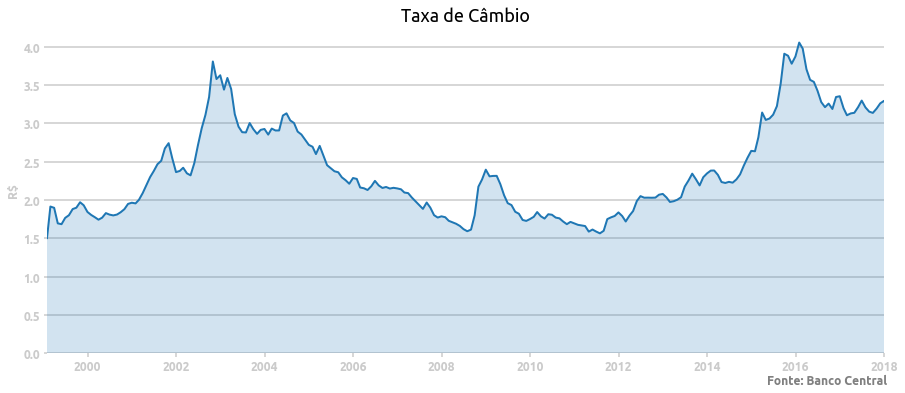

In [6]:
families = ['ubuntu']
matplotlib.rcParams.update({'font.size': 12, 'font.family': families, 'font.weight': 'semibold'})

axis_color = '#cbcbcb'

fig = plt.figure(figsize=(15, 6))
ax1 = plt.subplot2grid((1, 1), (0, 0))

plt.grid(color=axis_color, axis='y', linewidth=1.5)

ax1.plot(dolar_hist.index, dolar_hist.valor.tolist(), linewidth=2)
ax1.fill_between(dolar_hist.index, dolar_hist.valor.tolist(), 0, alpha=0.2, zorder=2)
ax1.set_ylim(0)
ax1.set_xlim(pd.datetime(1999,2,1), pd.datetime(2018,1,1))
plt.ylabel('R$', color=axis_color, weight='bold')
plt.title('Taxa de Câmbio', fontsize=18)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.tick_params(axis='x', colors=axis_color, width=1.5)
ax1.tick_params(axis='y', colors=axis_color, width=1.5)
ax1.yaxis.label.set_color(axis_color)

ax1.text(0.86, -0.1, 'Fonte: Banco Central',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax1.transAxes,
        color='grey')

plt.show()

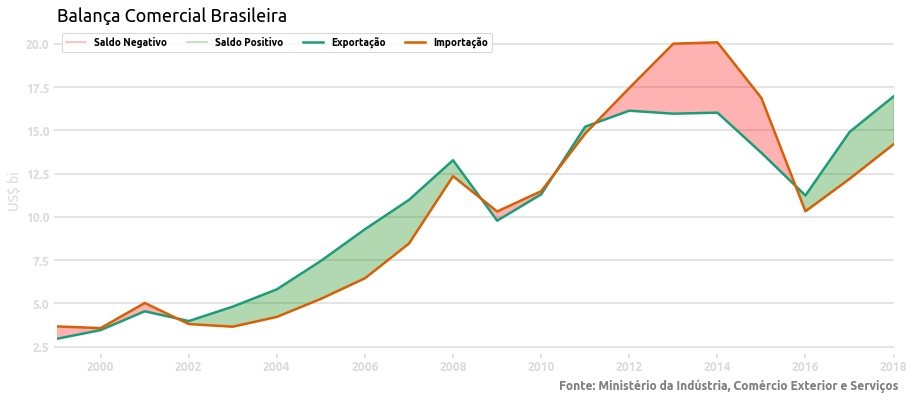

In [8]:
x = balanca.index
y_in = balanca.IMPORTACAO.tolist()
y_out = balanca.EXPORTACAO.tolist()
alpha = 0.3
axis_color = '#dcdcdc'

fig = plt.figure(figsize=(15, 6))
ax1 = plt.subplot2grid((1, 1), (0, 0))

plt.grid(color=axis_color, axis='y', linewidth=1.5)
ax1.tick_params(axis='x', colors=axis_color, width=1.5)
ax1.tick_params(axis='y', colors=axis_color, width=1.5)
ax1.yaxis.label.set_color(axis_color)

ax1.plot([], [], label='Saldo Negativo', color='r', alpha=alpha)
ax1.plot([], [], label='Saldo Positivo', color='g', alpha=alpha)
ax1.plot(x, y_out , label='Exportação', linewidth=2.5, color='#1b9e77')
ax1.plot(x, y_in, label='Importação', linewidth=2.5, color='#d95f02')
ax1.fill_between(x, y_out, y_in, 
                 alpha=alpha, color='r', interpolate=True,
                 where=(balanca.IMPORTACAO > balanca.EXPORTACAO).tolist(), zorder=2)
ax1.fill_between(x, y_out, y_in,
                 alpha=alpha, color='g', interpolate=True,
                 where=(balanca.IMPORTACAO < balanca.EXPORTACAO).tolist(), zorder=2)
ax1.set_xlim(pd.datetime(1999,1,1), pd.datetime(2018,1,1))
def mjrFormatter(x, pos):
    return "{:,}".format(x/1000000000)

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

plt.ylabel('US$ bi', fontsize=14)
plt.title('Balança Comercial Brasileira', fontsize=18, loc='left')

plt.legend(fontsize=10, ncol=4, frameon=None)

ax1.text(0.6, -0.12, 'Fonte: Ministério da Indústria, Comércio Exterior e Serviços',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax1.transAxes,
        color='grey')

plt.show()